### Imports

In [22]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from transformer import Transformer

### Artificial Time Series

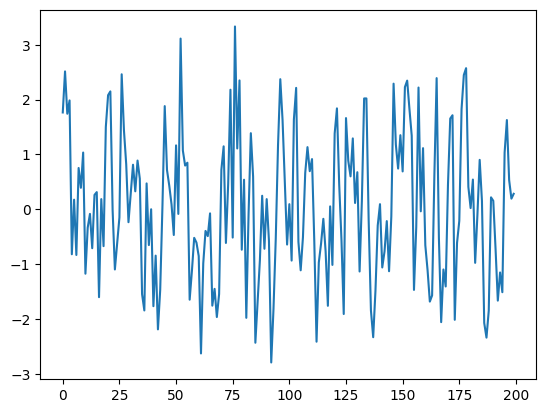

In [23]:
sequence = np.sin(np.arange(0,200,1))+np.cos(np.arange(0,50,0.25))+np.random.normal(0,0.8,200)
plt.plot(sequence)
plt.show()

### Test Data Loader

In [3]:
from utils import load_src_trg

In [4]:
data_iter = load_src_trg(sequence.reshape(-1, 1), 10, 10, 2)

In [5]:
for src, trg, trg_y in data_iter:
    print(np.shape(src))
    print(src)
    print(trg)
    print(trg_y)
    break

torch.Size([2, 10, 1])
tensor([[[ 1.2533],
         [ 2.6764],
         [ 1.7967],
         [ 1.3982],
         [-1.0167],
         [-1.2929],
         [-1.3426],
         [ 1.2178],
         [ 2.4508],
         [ 0.5409]],

        [[ 2.6764],
         [ 1.7967],
         [ 1.3982],
         [-1.0167],
         [-1.2929],
         [-1.3426],
         [ 1.2178],
         [ 2.4508],
         [ 0.5409],
         [-0.8776]]], dtype=torch.float64)
tensor([[[ 0.5409],
         [-0.8776],
         [-2.9427],
         [-0.9568],
         [-0.7993],
         [ 0.8306],
         [-0.5826],
         [-0.2945],
         [ 0.3202],
         [-0.3474]],

        [[-0.8776],
         [-2.9427],
         [-0.9568],
         [-0.7993],
         [ 0.8306],
         [-0.5826],
         [-0.2945],
         [ 0.3202],
         [-0.3474],
         [ 0.4304]]], dtype=torch.float64)
tensor([[[-0.8776],
         [-2.9427],
         [-0.9568],
         [-0.7993],
         [ 0.8306],
         [-0.5826],
       

### Test Training

In [24]:
split = 0.8
pred_window = 5
train_sequence = sequence[:int(len(sequence)*split)]
test_sequence = sequence[int(len(sequence)*split):]

In [25]:
model = Transformer(pred_offset = pred_window,
                    input_size = 1,
                    output_size = 1,
                    max_seq_length = pred_window,
                    embedding_size = 100,
                    num_basic_encoders = 4,
                    num_atten_heads = 4,
                    num_basic_decoders = 4,
                    positional_ecoding = False)

Stopped at  188 0.0063417409857114155


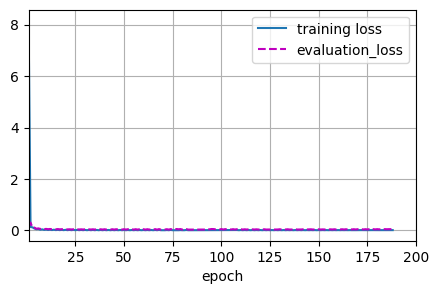

In [26]:
model.start_training(sequence=train_sequence.reshape(-1, 1),
                     loss=nn.MSELoss(),
                     metric=nn.MSELoss(),
                     epochs=200,
                     batch_size=64,
                     num_warmup_steps=1,
                     optimizer_params={'beta1':0.01, 'beta2': 0.01, 'epsilon': 0.01},
                     standardize=False,
                     verbose=False,
                     plot=True)

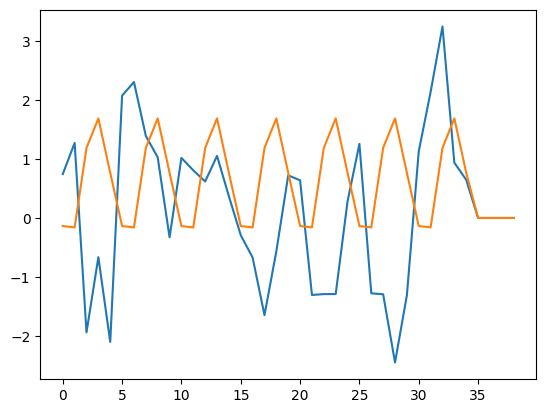

In [21]:
l = int(len(sequence)*(1-split))
y_hat = np.zeros(l)
y = np.zeros(l)
for i in range(int(l/pred_window)):
    x = test_sequence[pred_window*i:pred_window*(i+1)].reshape(-1, 1)
    y[pred_window*i:pred_window*(i+1)] = test_sequence[pred_window*(i+1):pred_window*(i+2)]
    y_hat[pred_window*i:pred_window*(i+1)] = model.predict(x, False)
plt.plot(y)
plt.plot(y_hat)
plt.show()